In [ ]:
First, trim primers using cutadapt (in screen)
for f in $(ls -1 *R1_001.fastq|sed 's/\_R1_001.fastq//')
do
cutadapt -g file:16S_primers.fa -G file:16S_primers_rev.fa -o trimmed/"$f"_R1_001_trim.fastq -p trimmed/"$f"_R2_001_trim_pair.fastq "$f"_R1_001.fastq "$f"_R2_001.fastq --overlap 2 -e 0.1
done


In [11]:
require("dada2")

Loading required package: dada2
Loading required package: Rcpp
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [4]:
path="~/Documents/DE_16S/Run2and3_0920/trimmed/"

In [6]:
list.files(path)

[1] "2018--BBO-BBY-27B-CV_S108_L001_R1_001_trim.fastq"         
  [2] "2018--BBO-BBY-27B-CV_S108_L001_R2_001_trim_pair.fastq"    
  [3] "2018--BBR-BBB-50B-CV_S105_L001_R1_001_trim.fastq"         
  [4] "2018--BBR-BBB-50B-CV_S105_L001_R2_001_trim_pair.fastq"    
  [5] "2018--BBR-BBG-38B-CV_S107_L001_R1_001_trim.fastq"         
  [6] "2018--BBR-BBG-38B-CV_S107_L001_R2_001_trim_pair.fastq"    
  [7] "2018--BBR-BBY-26B-CV_S106_L001_R1_001_trim.fastq"         
  [8] "2018--BBR-BBY-26B-CV_S106_L001_R2_001_trim_pair.fastq"    
  [9] "2018--BPR-BPG-38O-CV_S109_L001_R1_001_trim.fastq"         
 [10] "2018--BPR-BPG-38O-CV_S109_L001_R2_001_trim_pair.fastq"    
 [11] "2018--BPR-BPR-02O-CV_S111_L001_R1_001_trim.fastq"         
 [12] "2018--BPR-BPR-02O-CV_S111_L001_R2_001_trim_pair.fastq"    
 [13] "2018--BPY-BPG-42O-CV_S110_L001_R1_001_trim.fastq"         
 [14] "2018--BPY-BPG-42O-CV_S110_L001_R2_001_trim_pair.fastq"    
 [15] "2018--BPY-BPY-29O-CV_S112_L001_R1_001_trim.fastq"         
 [16] "2018--BPY-BPY-29O-CV_S112_L001_R2_001_trim_pair.fastq"    
 [17] "2018--HIGH-MONO-HM4Y44-CV_S1_L001_R1_001_trim.fastq"      
 [18] "2018--HIGH-MONO-HM4Y44-CV_S1_L001_R2_001_trim_pair.fastq" 
 [19] "2018--HIGH-MONO-HM4Y53-CV_S2_L001_R1_001_trim.fastq"      
 [20] "2018--HIGH-MONO-HM4Y53-CV_S2_L001_R2_001_trim_pair.fastq" 
 [21] "2018--HIGH-MONO-HM8O20-CV_S3_L001_R1_001_trim.fastq"      
 [22] "2018--HIGH-MONO-HM8O20-CV_S3_L001_R2_001_trim_pair.fastq" 
 [23] "2018--HIGH-MONO-HM8O34-CV_S4_L001_R1_001_trim.fastq"      
 [24] "2018--HIGH-MONO-HM8O34-CV_S4_L001_R2_001_trim_pair.fastq" 
 [25] "2018--HIGH-MONO-HM8O66-CV_S5_L001_R1_001_trim.fastq"      
 [26] "2018--HIGH-MONO-HM8O66-CV_S5_L001_R2_001_trim_pair.fastq" 
 [27] "2018--HIGH-MONO-HM8Y28-CV_S6_L001_R1_001_trim.fastq"      
 [28] "2018--HIGH-MONO-HM8Y28-CV_S6_L001_R2_001_trim_pair.fastq" 
 [29] "2018--HIGH-MONO-HM8Y52-CV_S7_L001_R1_001_trim.fastq"      
 [30] "2018--HIGH-MONO-HM8Y52-CV_S7_L001_R2_001_trim_pair.fastq" 
 [31] "2018--HIGH-POLY-HP1W26-CV_S9_L001_R1_001_trim.fastq"      
 [32] "2018--HIGH-POLY-HP1W26-CV_S9_L001_R2_001_trim_pair.fastq" 
 [33] "2018--HIGH-POLY-HP1W5-CV_S8_L001_R1_001_trim.fastq"       
 [34] "2018--HIGH-POLY-HP1W5-CV_S8_L001_R2_001_trim_pair.fastq"  
 [35] "2018--HIGH-POLY-HP1W62-CV_S79_L001_R1_001_trim.fastq"     
 [36] "2018--HIGH-POLY-HP1W62-CV_S79_L001_R2_001_trim_pair.fastq"
 [37] "2018--HIGH-POLY-HP1W63-CV_S10_L001_R1_001_trim.fastq"     
 [38] "2018--HIGH-POLY-HP1W63-CV_S10_L001_R2_001_trim_pair.fastq"
 [39] "2018--HIGH-POLY-HP1Y33-IR_S11_L001_R1_001_trim.fastq"     
 [40] "2018--HIGH-POLY-HP1Y33-IR_S11_L001_R2_001_trim_pair.fastq"
 [41] "2018--HIGH-POLY-HP1Y55-IR_S12_L001_R1_001_trim.fastq"     
 [42] "2018--HIGH-POLY-HP1Y55-IR_S12_L001_R2_001_trim_pair.fastq"
 [43] "2018--HIGH-POLY-HP1Y64-IR_S13_L001_R1_001_trim.fastq"     
 [44] "2018--HIGH-POLY-HP1Y64-IR_S13_L001_R2_001_trim_pair.fastq"
 [45] "2018--HIGH-POLY-HP1Y75-IR_S14_L001_R1_001_trim.fastq"     
 [46] "2018--HIGH-POLY-HP1Y75-IR_S14_L001_R2_001_trim_pair.fastq"
 [47] "2018--HIGH-POLY-HP1Y84-IR_S15_L001_R1_001_trim.fastq"     
 [48] "2018--HIGH-POLY-HP1Y84-IR_S15_L001_R2_001_trim_pair.fastq"
 [49] "2018--HIGH-POLY-HP3B59-CV_S16_L001_R1_001_trim.fastq"     
 [50] "2018--HIGH-POLY-HP3B59-CV_S16_L001_R2_001_trim_pair.fastq"
 [51] "2018--HIGH-POLY-HP3B65-CV_S17_L001_R1_001_trim.fastq"     
 [52] "2018--HIGH-POLY-HP3B65-CV_S17_L001_R2_001_trim_pair.fastq"
 [53] "2018--HIGH-POLY-HP3W36-CV_S18_L001_R1_001_trim.fastq"     
 [54] "2018--HIGH-POLY-HP3W36-CV_S18_L001_R2_001_trim_pair.fastq"
 [55] "2018--HIGH-POLY-HP3W36-IR_S22_L001_R1_001_trim.fastq"     
 [56] "2018--HIGH-POLY-HP3W36-IR_S22_L001_R2_001_trim_pair.fastq"
 [57] "2018--HIGH-POLY-HP3W37-IR_S23_L001_R1_001_trim.fastq"     
 [58] "2018--HIGH-POLY-HP3W37-IR_S23_L001_R2_001_trim_pair.fastq"
 [59] "2018--HIGH-POLY-HP3W4-IR_S20_L001_R1_001_trim.fastq"      
 [60] "2018--HIGH-POLY-HP3W4-IR_S20_L001_R2_001_trim_pair.fastq" 
 [61] "2018--HIGH-POLY-HP3W40-IR_S24_L001_

In [7]:
fnFs = sort(list.files(path, pattern="_R1_001_trim.fastq", full.names = TRUE))
fnRs = sort(list.files(path, pattern="_R2_001_trim_pair.fastq", full.names = TRUE))

In [8]:
sample.names = sapply(strsplit(basename(fnFs), "_"), `[`, 1)

In [9]:
head(sample.names)

[1] "2018--BBO-BBY-27B-CV" "2018--BBR-BBB-50B-CV" "2018--BBR-BBG-38B-CV"
[4] "2018--BBR-BBY-26B-CV" "2018--BPR-BPG-38O-CV" "2018--BPR-BPR-02O-CV"

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


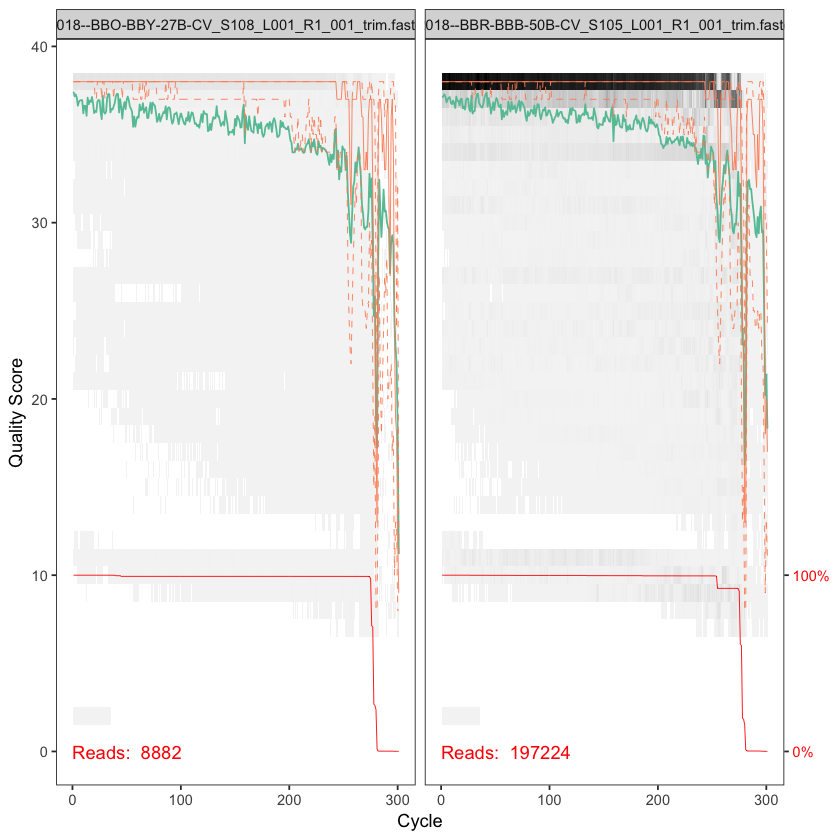

In [12]:
plotQualityProfile(fnFs[1:2])

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


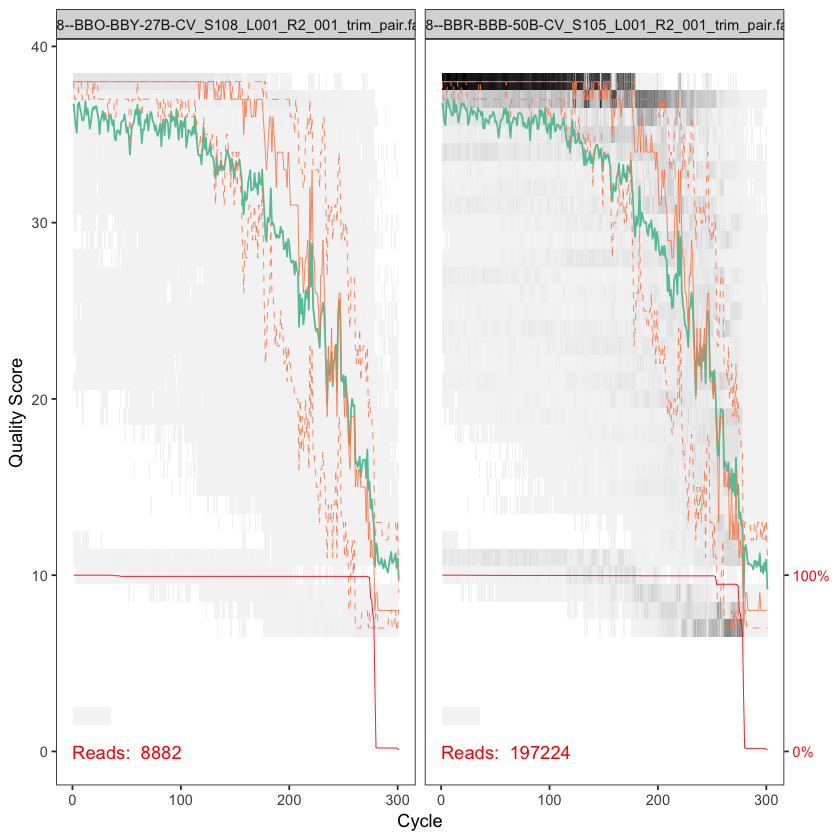

In [13]:
plotQualityProfile(fnRs[1:2])

In [14]:
filtFs = file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs = file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))
names(filtFs) = sample.names
names(filtRs) = sample.names

In [15]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(240,230),
              maxN=0, maxEE=c(2,2), truncQ=2, rm.phix=TRUE,
              compress=TRUE, multithread=TRUE, verbose=TRUE) # On Windows set multithread=FALSE
head(out)

Creating output directory: /Users/sarah/Documents/DE_16S/Run2and3_0920/trimmed//filtered


,reads.in,reads.out
2018--BBO-BBY-27B-CV_S108_L001_R1_001_trim.fastq,8882,5981
2018--BBR-BBB-50B-CV_S105_L001_R1_001_trim.fastq,197224,139322
2018--BBR-BBG-38B-CV_S107_L001_R1_001_trim.fastq,127126,83975
2018--BBR-BBY-26B-CV_S106_L001_R1_001_trim.fastq,150947,102780
2018--BPR-BPG-38O-CV_S109_L001_R1_001_trim.fastq,155963,112542
2018--BPR-BPR-02O-CV_S111_L001_R1_001_trim.fastq,241779,162805


In [16]:
errF = learnErrors(filtFs, multithread=TRUE)

106704000 total bases in 444600 reads from 5 samples will be used for learning the error rates.


In [17]:
errR <- learnErrors(filtRs, multithread=TRUE)

102258000 total bases in 444600 reads from 5 samples will be used for learning the error rates.


In [18]:
dadaFs <- dada(filtFs, err=errF, multithread=FALSE)

Sample 1 - 5981 reads in 1189 unique sequences.
Sample 2 - 139322 reads in 16279 unique sequences.
Sample 3 - 83975 reads in 17256 unique sequences.
Sample 4 - 102780 reads in 6152 unique sequences.
Sample 5 - 112542 reads in 13580 unique sequences.
Sample 6 - 162805 reads in 35248 unique sequences.
Sample 7 - 103358 reads in 16172 unique sequences.
Sample 8 - 667645 reads in 61775 unique sequences.
Sample 9 - 42829 reads in 9820 unique sequences.
Sample 10 - 32565 reads in 6173 unique sequences.
Sample 11 - 39753 reads in 8389 unique sequences.
Sample 12 - 20675 reads in 6075 unique sequences.
Sample 13 - 57863 reads in 12115 unique sequences.
Sample 14 - 44377 reads in 3065 unique sequences.
Sample 15 - 51380 reads in 18606 unique sequences.
Sample 16 - 113 reads in 58 unique sequences.
Sample 17 - 40916 reads in 5637 unique sequences.
Sample 18 - 53047 reads in 5651 unique sequences.
Sample 19 - 47383 reads in 14419 unique sequences.
Sample 20 - 52730 reads in 7525 unique sequences.

In [19]:
dadaRs <- dada(filtRs, err=errR, multithread=TRUE)

Sample 1 - 5981 reads in 1701 unique sequences.
Sample 2 - 139322 reads in 24716 unique sequences.
Sample 3 - 83975 reads in 24050 unique sequences.
Sample 4 - 102780 reads in 12098 unique sequences.
Sample 5 - 112542 reads in 18908 unique sequences.
Sample 6 - 162805 reads in 47086 unique sequences.
Sample 7 - 103358 reads in 23449 unique sequences.
Sample 8 - 667645 reads in 103206 unique sequences.
Sample 9 - 42829 reads in 10387 unique sequences.
Sample 10 - 32565 reads in 8232 unique sequences.
Sample 11 - 39753 reads in 7468 unique sequences.
Sample 12 - 20675 reads in 8181 unique sequences.
Sample 13 - 57863 reads in 16865 unique sequences.
Sample 14 - 44377 reads in 6133 unique sequences.
Sample 15 - 51380 reads in 22399 unique sequences.
Sample 16 - 113 reads in 62 unique sequences.
Sample 17 - 40916 reads in 9306 unique sequences.
Sample 18 - 53047 reads in 8504 unique sequences.
Sample 19 - 47383 reads in 17044 unique sequences.
Sample 20 - 52730 reads in 7534 unique sequenc

In [20]:
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)

5924 paired-reads (in 23 unique pairings) successfully merged out of 5929 (in 25 pairings) input.
137758 paired-reads (in 129 unique pairings) successfully merged out of 138470 (in 214 pairings) input.
79685 paired-reads (in 463 unique pairings) successfully merged out of 81981 (in 1027 pairings) input.
101917 paired-reads (in 137 unique pairings) successfully merged out of 102313 (in 204 pairings) input.
110388 paired-reads (in 156 unique pairings) successfully merged out of 111643 (in 260 pairings) input.
156741 paired-reads (in 677 unique pairings) successfully merged out of 159255 (in 1257 pairings) input.
102158 paired-reads (in 165 unique pairings) successfully merged out of 102718 (in 225 pairings) input.
661581 paired-reads (in 260 unique pairings) successfully merged out of 665032 (in 597 pairings) input.
40445 paired-reads (in 370 unique pairings) successfully merged out of 41038 (in 494 pairings) input.
31339 paired-reads (in 337 unique pairings) successfully merged out of 3

75474 paired-reads (in 410 unique pairings) successfully merged out of 75943 (in 477 pairings) input.
77515 paired-reads (in 363 unique pairings) successfully merged out of 78932 (in 628 pairings) input.
32131 paired-reads (in 257 unique pairings) successfully merged out of 32433 (in 290 pairings) input.
57310 paired-reads (in 263 unique pairings) successfully merged out of 57915 (in 383 pairings) input.
79643 paired-reads (in 654 unique pairings) successfully merged out of 81188 (in 981 pairings) input.
29856 paired-reads (in 93 unique pairings) successfully merged out of 30146 (in 148 pairings) input.
85432 paired-reads (in 443 unique pairings) successfully merged out of 86688 (in 695 pairings) input.
105691 paired-reads (in 630 unique pairings) successfully merged out of 108152 (in 923 pairings) input.
70770 paired-reads (in 275 unique pairings) successfully merged out of 71511 (in 431 pairings) input.
65704 paired-reads (in 409 unique pairings) successfully merged out of 66364 (in 

No paired-reads (in ZERO unique pairings) successfully merged out of 24 pairings) input.
0 paired-reads (in 0 unique pairings) successfully merged out of 17 (in 1 pairings) input.


In [21]:
seqtab <- makeSequenceTable(mergers)

In [22]:
write.csv(seqtab, file="~/Documents/DE_16S/Run23_ASV.csv")

In [23]:
dim(seqtab)

[1]   169 13719

In [24]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 4865 bimeras out of 13719 input sequences.


[1]  169 8854

In [25]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)

,input,filtered,denoisedF,denoisedR,merged,nonchim
2018--BBO-BBY-27B-CV,8882,5981,5932,5943,5924,5924
2018--BBR-BBB-50B-CV,197224,139322,138871,138734,137758,136851
2018--BBR-BBG-38B-CV,127126,83975,82453,82753,79685,70317
2018--BBR-BBY-26B-CV,150947,102780,102437,102463,101917,100210
2018--BPR-BPG-38O-CV,155963,112542,111977,111977,110388,109368
2018--BPR-BPR-02O-CV,241779,162805,160072,160484,156741,150738


In [26]:
write.csv(seqtab.nochim, file="~/Documents/DE_16S/Run23_ASV_nochim.csv")

In [27]:
taxa = assignTaxonomy(seqtab.nochim, "~/Documents/silva/silva_nr99_v138_train_set.fa", multithread=TRUE)

In [29]:
dim(taxa)

[1] 8854    6

In [30]:
write.csv(taxa, file="~/Documents/DE_16S/Run23_taxa.csv")

In [32]:
taxaspecies <- addSpecies(taxa, "~/Documents/silva/silva_species_assignment_v138.fa", n=100)